<a href="https://colab.research.google.com/github/JaquesZanon/JOB/blob/main/Pedidos_bins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importa aquivo de texto (.txt)
import pandas as pd
import numpy as np
df_original = pd.read_csv('/content/drive/MyDrive/JOB-Martins/Pricing/BaseGoiasAmareloBranco.csv',sep=';',decimal=',')
df_custo = pd.read_csv('/content/drive/MyDrive/JOB-Martins/Pricing/ProdutosGoiais.csv',sep=';',decimal=',')
custo_GO = pd.read_csv('/content/drive/MyDrive/JOB-Martins/Pricing/TabelaCustoGoias.csv',sep=';',decimal=',')
df_original.head()

,DtMovimento,OrigemVenda,NrPedido,IdCliente,IdFilialContabil,IdFilialExpedicao,IdFilialFaturamento,IdFilialFilialFornecedor,IdFilialLogistica,IdCondPagto,IdOrigemPedido,IdTipoPedido,IdStatusPedido,CodigoCliente,TipoOperacao,CdDimensao,DsUnidadeNegocio,DsSegmentoMercado,DsCanalComercializacao,DsAtividadeCliente,RazaoSocial,NmFantasia,SegmentoEstrategico,NmRegiaoGeografica,NmMesoRegiao,NmMicroRegiao,Cidade,Latitude,Longitude,TipoPessoa,IdProduto,DsSuperTipoProduto,NmGrupoEconomico,DsDivisaoFornecedor,DsGrupo,DsCategoria,DsSubCategoria,COD_PRODUTO,NmProduto,CodProdutoSimilar,DsProdutoSimilar,DsMarca,DsDivisaoMercado,QtdeVendida,VlVendaLiquido,VlVendaBruto,VlTotalBruto,VlTotalLiquido,VlImpostos,VlReceitaLiquida,VlLogTranspCubico,VlLogArmazenagem,VlLogCustoDistribuicao,VlCustoLogistica,CMV,VlFunding,VlDespVenCustoReprFuncionario,VlDespVenCustoVender,VlDespVenCustoComissao,VlDespesasVendas,MargemContribuicao,DescontoTotal,MargemBruta,VlEncargosVendor,VlGapVendor,VlCstCusto
0,2021-04-05,B2B MARTINS,1855280.0,6003267.0,187.0,187.0,12635.0,12635.0,167.0,309.0,3.0,7054.0,365.0,5662310.0,TIPO DO PEDIDO,5662310.0,VAREJO ALIMENTAR,VAREJO ALIMENTAR,VAREJO ALIMENTAR,VRJ-SUPERMERCADO / PEG-PAG,SUPERMERCADO DU BOSQUE LTDA,SUPERMERCADO DU BOSQUE,Amarelo,CENTRO-OESTE,CENTRO GO,GOIANIA,SENADOR CANEDO,-49.0931,-49.0931,PESSOA JURIDICA,79402.0,PRODUTO,FABRICA PAPEL S.THEREZINHA,FABRICA PAPEL STA TEREZINHA S/A-HIG,HIGIENE,HIGIENE INTIMA FEMININA,ABSORVENTE EXTERNO,200574.0,ABS.SYM NOITE COB.SU.C/AB.8X1,200574.0,ABS.SYM NOITE COB.SU.C/AB.8X1,Sym,"Higiene, Beleza e Limpeza",12.0,2.44,2.52,30.24,29.28,4.56,24.72,0.00,0.37,0.74,NaN,23.15,3.6,0.0,0.0,1.08,NaN,2.86,0.91,5.17,0.0,0.0,NaN
1,2021-04-08,FORÇA DE VENDAS,1956839.0,181980.0,187.0,187.0,12583.0,12583.0,163.0,325.0,2.0,938.0,365.0,676468.0,TIPO DO PEDIDO,676468.0,VAREJO ALIMENTAR,VAREJO ALIMENTAR,VAREJO ALIMENTAR,VRJ-MERCEARIA,GILVANE MAGALHAES PAULA CARNEIRO ME,,Amarelo,CENTRO-OESTE,CENTRO GO,CERES,GOIANESIA,-15.1737,-49.2365,PESSOA JURIDICA,10115.0,PRODUTO,ALPARGATAS,ALPARGATAS S/A,CALCADOS,SANDALIA,COLOR,1236740.0,SAND.HAV.COL.PRETO 41/2 6X1,188.0,SAND.HAV.COLOR ADULTO 6X1,Havaianas,"Alimentos, Bazar e Bebidas",1.0,56.95,59.95,59.95,56.95,10.95,46.00,0.08,0.69,1.10,NaN,37.28,0.0,0.0,0.0,1.77,NaN,4.96,3.00,8.73,0.0,0.0,NaN
2,2021-04-08,B2B MARTINS,1959138.0,2372823.0,1.0,1.0,142.0,142.0,167.0,1169.0,3.0,8629.0,365.0,2583176.0,NaN,2583176.0,VAREJO ALIMENTAR,VAREJO ALIMENTAR,VAREJO ALIMENTAR,VRJ-MERCEARIA,SUPERMERCADO BREU LTDA,BREU SUPERMERCADO,Amarelo,CENTRO-OESTE,CENTRO GO,ANAPOLIS,ANAPOLIS,-16.2669,-48.9439,PESSOA JURIDICA,222602.0,PRODUTO,ALPARGATAS,ALPARGATAS S/A,CALCADOS,SANDALIA,KIDS/BABY,1219255.0,SAND.HAV.N.BAB.D.CL.RSA.17/8,865.0,SAND.HAV.BABY DISNEY CLASSICS,Havaianas,"Alimentos, Bazar e Bebidas",1.0,19.40,20.42,20.42,19.40,3.02,16.38,0.04,0.25,0.20,NaN,10.81,0.0,0.0,0.0,0.78,NaN,4.23,1.02,5.57,0.0,0.0,NaN
3,2021-04-12,FORÇA DE VENDAS,2018407.0,801322.0,187.0,187.0,12583.0,12583.0,167.0,1172.0,2.0,938.0,365.0,1205870.0,TIPO DO PEDIDO,1205870.0,VAREJO ALIMENTAR,VAREJO ALIMENTAR,VAREJO ALIMENTAR,VRJ-ARMARINHOS LJ/BIJOUTERIA,GEISLA DE ASSIS LIMA,CRIARTES BIJUTERIAS,Amarelo,CENTRO-OESTE,SUL GO,SUDOESTE DE GOIAS,JATAI,-17.8814,-51.7144,PESSOA JURIDICA,222578.0,PRODUTO,ALPARGATAS,ALPARGATAS S/A,CALCADOS,SANDALIA,KIDS/BABY,1219228.0,SAND.HAV.K.CARS AM.OURO 31/2,492.0,SAND.HAV.KIDS CARS,Havaianas,"Alimentos, Bazar e Bebidas",2.0,18.33,18.33,36.66,36.66,7.04,29.62,0.00,0.44,0.49,NaN,20.61,0.0,0.0,0.0,1.36,NaN,6.36,0.00,9.01,0.0,0.0,NaN
4,2021-04-16,FORÇA DE VENDAS,2139574.0,1373122.0,187.0,187.0,14768.0,14768.0,167.0,1356.0,2.0,938.0,365.0,1764260.0,TIPO DO PEDIDO,1764260.0,VAREJO ALIMENTAR,VAREJO ALIMENTAR,VAREJO ALIMENTAR,VRJ-MERCEARIA,FRANEDISON ALEXANDRE COSTA,SUPERMERCADO VIEIRA,Amarelo,CENTRO-OESTE,CENTRO GO,GOIANIA,SENADOR CANEDO,-16.7081,-49.0931,PESSOA JURIDICA,219258.0,PRODUTO,AEROFLEX IND DE AEROSOL LTDA,AEROFLEX IND DE AEROSOL LTDA,LIMPEZA,INSETICIDA/REPELENTE,INSETICIDA AEROSOL,170

In [6]:
df = df_original.groupby(['CodProdutoSimilar','DsProdutoSimilar','NmMesoRegiao','SegmentoEstrategico','IdCliente','NrPedido'])[['QtdeVendida','VlTotalLiquido']].sum()
df = df.reset_index()
df

,CodProdutoSimilar,DsProdutoSimilar,NmMesoRegiao,SegmentoEstrategico,IdCliente,NrPedido,QtdeVendida,VlTotalLiquido
0,3.0,ATUM RALADO ROBINSON CRUSOE 170G,CENTRO GO,Amarelo,1373122.0,4185085.0,9.0,38.07
1,3.0,ATUM RALADO ROBINSON CRUSOE 170G,CENTRO GO,Amarelo,1402224.0,2082731.0,12.0,48.00
2,3.0,ATUM RALADO ROBINSON CRUSOE 170G,CENTRO GO,Amarelo,2071313.0,2589935.0,24.0,94.56
3,3.0,ATUM RALADO ROBINSON CRUSOE 170G,CENTRO GO,Amarelo,4110923.0,2292746.0,36.0,140.04
4,3.0,ATUM RALADO ROBINSON CRUSOE 170G,CENTRO GO,Amarelo,5746416.0,2172234.0,27.0,107.19
...,...,...,...,...,...,...,...,...
14349,4900621.0,AZEITE BORGES E.V.ORG.VD.500ML,CENTRO GO,Amarelo,3284596.0,2384723.0,1.0,21.26
14350,4900621.0,AZEITE BORGES E.V.ORG.VD.500ML,CENTRO GO,Branco,399511.0,4323409.0,4.0,92.24
14351,4900621.0,AZEITE BORGES E.V.ORG.VD.500ML,LESTE GO,Amarelo,2513307.0,3518424.0,3.0,58.65
14352,4900621.0,AZEITE BORGES E.V.ORG.VD.500ML,NOROESTE GO,Amarelo,4424895.0,3644723.0,24.0,451.44


In [23]:
import matplotlib.pyplot as plt
from scipy.stats import skew
from tqdm import tqdm
import numpy as np 
import pylab as p
from scipy.stats import kurtosis
from statistics import mode
import statistics

In [ ]:
def media (dados):
  if dados.empty == True:
      return(0)
  else:
    return(statistics.mean(dados))

In [ ]:
df.SegmentoEstrategico.unique()[0]

'Amarelo'

## Bins e clientes e quantidade para cada bin

In [ ]:
res_final = pd.DataFrame(columns=hist.columns, index=range(0))

for i in range(0,1):
  
  
  df_sel = df[(df['NmMesoRegiao']==df.NmMesoRegiao.unique()[0])]
  df_sel = df_sel[df_sel.VlTotalLiquido!=0]
  df_sel['RB'] = df_sel.VlTotalLiquido/df_sel.QtdeVendida
  df_sel = df_sel[df_sel.CodProdutoSimilar==df_sel.CodProdutoSimilar.unique()[i]]
  n, bins, patches = plt.hist(x=df_sel.RB, bins=12, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
  hist = pd.concat([pd.DataFrame.from_dict(n),pd.DataFrame.from_dict(bins)],axis=1)
  hist.columns = ['n','bins']
  max(hist.n)
  bins_max = list(hist[hist.n==max(hist.n)]['bins'])[0]
  rating = []
  for i in range(0, 13):
    rating.append('menor' if list(hist.bins)[i] <=bins_max else 'maior ')


  hist['Cod_produto']=[df_sel.CodProdutoSimilar.unique()[0]]*13
  hist['Ds_Produto']=[df_sel.DsProdutoSimilar.unique()[0]]*13
  hist['rating']=rating
  hist['bin']=range(0,13)
  hist['Preço_Minimo']=hist[hist.rating=='menor']['bins'].min()
  hist["Preço_Máximo"]=hist[hist.rating=='menor']['bins'].max()
  bin1 = df_sel[df_sel.RB<hist.bins[1]]['IdCliente']#bin 0
  bin2 = df_sel[(df_sel.RB>=hist.bins[1]) & (df_sel.RB<hist.bins[2])]['IdCliente']#bin 1
  bin3 =df_sel[(df_sel.RB>=hist.bins[2]) & (df_sel.RB<hist.bins[3])]['IdCliente']#bin 2
  bin4 =df_sel[(df_sel.RB>=hist.bins[3]) & (df_sel.RB<hist.bins[4])]['IdCliente']#bin 3
  bin5 =df_sel[(df_sel.RB>=hist.bins[4]) & (df_sel.RB<hist.bins[5])]['IdCliente']#bin 4
  bin6 =df_sel[(df_sel.RB>=hist.bins[5]) & (df_sel.RB<hist.bins[6])]['IdCliente']#bin 5
  bin7 =df_sel[(df_sel.RB>=hist.bins[6]) & (df_sel.RB<hist.bins[7])]['IdCliente']#bin 6
  bin8 =df_sel[(df_sel.RB>=hist.bins[7]) & (df_sel.RB<hist.bins[8])]['IdCliente']#bin 7
  bin9 =df_sel[(df_sel.RB>=hist.bins[8]) & (df_sel.RB<hist.bins[9])]['IdCliente']#bin 8
  bin10 =df_sel[(df_sel.RB>=hist.bins[9]) & (df_sel.RB<=hist.bins[10])]['IdCliente']#bin 9
  bin11 =df_sel[(df_sel.RB>=hist.bins[10]) & (df_sel.RB<=hist.bins[11])]['IdCliente']#bin 9
  bin12 =df_sel[(df_sel.RB>=hist.bins[11]) & (df_sel.RB<=hist.bins[12])]['IdCliente']#bin 9
  bin13 =df_sel[(df_sel.RB>hist.bins[12])]['IdCliente']#bin 9 
  lista_clientes = pd.DataFrame([list(bin1),
              list(bin2),
              list(bin3),
              list(bin4),
              list(bin5),
              list(bin6),
              list(bin7),
              list(bin8),
              list(bin9),
              list(bin10),
              list(bin11),
              list(bin12),
              list(bin13)])
  bin1_Qt = df_sel[df_sel.RB<hist.bins[1]]['QtdeVendida']#bin 0
  bin2_Qt = df_sel[(df_sel.RB>=hist.bins[1]) & (df_sel.RB<hist.bins[2])]['QtdeVendida']#bin 1
  bin3_Qt =df_sel[(df_sel.RB>=hist.bins[2]) & (df_sel.RB<hist.bins[3])]['QtdeVendida']#bin 2
  bin4_Qt=df_sel[(df_sel.RB>=hist.bins[3]) & (df_sel.RB<hist.bins[4])]['QtdeVendida']#bin 3
  bin5_Qt =df_sel[(df_sel.RB>=hist.bins[4]) & (df_sel.RB<hist.bins[5])]['QtdeVendida']#bin 4
  bin6_Qt =df_sel[(df_sel.RB>=hist.bins[5]) & (df_sel.RB<hist.bins[6])]['QtdeVendida']#bin 5
  bin7_Qt =df_sel[(df_sel.RB>=hist.bins[6]) & (df_sel.RB<hist.bins[7])]['QtdeVendida']#bin 6
  bin8_Qt =df_sel[(df_sel.RB>=hist.bins[7]) & (df_sel.RB<hist.bins[8])]['QtdeVendida']#bin 7
  bin9_Qt =df_sel[(df_sel.RB>=hist.bins[8]) & (df_sel.RB<hist.bins[9])]['QtdeVendida']#bin 8
  bin10_Qt =df_sel[(df_sel.RB>=hist.bins[9]) & (df_sel.RB<=hist.bins[10])]['QtdeVendida']#bin 9
  bin11_Qt =df_sel[(df_sel.RB>=hist.bins[10]) & (df_sel.RB<=hist.bins[11])]['QtdeVendida']#bin 9
  bin12_Qt =df_sel[(df_sel.RB>=hist.bins[11]) & (df_sel.RB<=hist.bins[12])]['QtdeVendida']#bin 9
  bin13_Qt =df_sel[(df_sel.RB>hist.bins[12])]['QtdeVendida']#bin 9 
  lista_clientes_Qt = pd.DataFrame([list(bin1_Qt),
              list(bin2_Qt),
              list(bin3_Qt),
              list(bin4_Qt),
              list(bin5_Qt),
              list(bin6_Qt),
              list(bin7_Qt),
              list(bin8_Qt),
              list(bin9_Qt),
              list(bin10_Qt),
              list(bin11_Qt),
              list(bin12_Qt),
              list(bin13_Qt)])

# Quantidade de Clientes por bin
  hist['quantidade_clientes'] = [len(lista_clientes.iloc[0,:].dropna()),
  len(lista_clientes.iloc[1,:].dropna()),
  len(lista_clientes.iloc[2,:].dropna()),
  len(lista_clientes.iloc[3,:].dropna()),
  len(lista_clientes.iloc[4,:].dropna()),
  len(lista_clientes.iloc[5,:].dropna()),
  len(lista_clientes.iloc[6,:].dropna()),
  len(lista_clientes.iloc[7,:].dropna()),
  len(lista_clientes.iloc[8,:].dropna()),
  len(lista_clientes.iloc[9,:].dropna()),
  len(lista_clientes.iloc[10,:].dropna()),
  len(lista_clientes.iloc[11,:].dropna()),
  len(lista_clientes.iloc[12,:].dropna())]

# Quantidade de itens por bin
  
  hist['volume'] = [sum(lista_clientes_Qt.iloc[0,:].dropna()),
  sum(lista_clientes_Qt.iloc[1,:].dropna()),
  sum(lista_clientes_Qt.iloc[2,:].dropna()),
  sum(lista_clientes_Qt.iloc[3,:].dropna()),
  sum(lista_clientes_Qt.iloc[4,:].dropna()),
  sum(lista_clientes_Qt.iloc[5,:].dropna()),
  sum(lista_clientes_Qt.iloc[6,:].dropna()),
  sum(lista_clientes_Qt.iloc[7,:].dropna()),
  sum(lista_clientes_Qt.iloc[8,:].dropna()),
  sum(lista_clientes_Qt.iloc[9,:].dropna()),
  sum(lista_clientes_Qt.iloc[10,:].dropna()),
  sum(lista_clientes_Qt.iloc[11,:].dropna()),
  sum(lista_clientes_Qt.iloc[12,:].dropna())]

# Skewness per bin
  hist['skewmness'] =[skew(df_sel[df_sel.RB<hist.bins[1]][['QtdeVendida']].iloc[:,0]),
  skew(df_sel[(df_sel.RB>=hist.bins[1]) & (df_sel.RB<hist.bins[2])][['QtdeVendida']].iloc[:,0]),
  skew(df_sel[(df_sel.RB>=hist.bins[2]) & (df_sel.RB<hist.bins[3])][['QtdeVendida']].iloc[:,0]),
  skew(df_sel[(df_sel.RB>=hist.bins[3]) & (df_sel.RB<hist.bins[4])][['QtdeVendida']].iloc[:,0]),
  skew(df_sel[(df_sel.RB>=hist.bins[4]) & (df_sel.RB<hist.bins[5])][['QtdeVendida']].iloc[:,0]),
  skew(df_sel[(df_sel.RB>=hist.bins[5]) & (df_sel.RB<hist.bins[6])][['QtdeVendida']].iloc[:,0]),
  skew(df_sel[(df_sel.RB>=hist.bins[6]) & (df_sel.RB<hist.bins[7])][['QtdeVendida']].iloc[:,0]),
  skew(df_sel[(df_sel.RB>=hist.bins[7]) & (df_sel.RB<hist.bins[8])][['QtdeVendida']].iloc[:,0]),
  skew(df_sel[(df_sel.RB>=hist.bins[8]) & (df_sel.RB<hist.bins[9])][['QtdeVendida']].iloc[:,0]),
  skew(df_sel[(df_sel.RB>=hist.bins[9]) & (df_sel.RB<hist.bins[10])][['QtdeVendida']].iloc[:,0]),
  skew(df_sel[(df_sel.RB>=hist.bins[10]) & (df_sel.RB<hist.bins[11])][['QtdeVendida']].iloc[:,0]),
  skew(df_sel[(df_sel.RB>=hist.bins[11]) & (df_sel.RB<hist.bins[12])][['QtdeVendida']].iloc[:,0]),
  skew(df_sel[(df_sel.RB>hist.bins[12])][['QtdeVendida']].iloc[:,0])]

# Kurtosis  per bin

  hist['kurtosis'] = [kurtosis(df_sel[df_sel.RB<hist.bins[1]][['QtdeVendida']].iloc[:,0], fisher=False),
  kurtosis(df_sel[(df_sel.RB>=hist.bins[1]) & (df_sel.RB<hist.bins[2])][['QtdeVendida']].iloc[:,0], fisher=False),
  kurtosis(df_sel[(df_sel.RB>=hist.bins[2]) & (df_sel.RB<hist.bins[3])][['QtdeVendida']].iloc[:,0], fisher=False),
  kurtosis(df_sel[(df_sel.RB>=hist.bins[3]) & (df_sel.RB<hist.bins[4])][['QtdeVendida']].iloc[:,0], fisher=False),
  kurtosis(df_sel[(df_sel.RB>=hist.bins[4]) & (df_sel.RB<hist.bins[5])][['QtdeVendida']].iloc[:,0], fisher=False),
  kurtosis(df_sel[(df_sel.RB>=hist.bins[5]) & (df_sel.RB<hist.bins[6])][['QtdeVendida']].iloc[:,0], fisher=False),
  kurtosis(df_sel[(df_sel.RB>=hist.bins[6]) & (df_sel.RB<hist.bins[7])][['QtdeVendida']].iloc[:,0], fisher=False),
  kurtosis(df_sel[(df_sel.RB>=hist.bins[7]) & (df_sel.RB<hist.bins[8])][['QtdeVendida']].iloc[:,0], fisher=False),
  kurtosis(df_sel[(df_sel.RB>=hist.bins[8]) & (df_sel.RB<hist.bins[9])][['QtdeVendida']].iloc[:,0], fisher=False),
  kurtosis(df_sel[(df_sel.RB>=hist.bins[9]) & (df_sel.RB<hist.bins[10])][['QtdeVendida']].iloc[:,0], fisher=False),
  kurtosis(df_sel[(df_sel.RB>=hist.bins[10]) & (df_sel.RB<hist.bins[11])][['QtdeVendida']].iloc[:,0], fisher=False),
  kurtosis(df_sel[(df_sel.RB>=hist.bins[11]) & (df_sel.RB<hist.bins[12])][['QtdeVendida']].iloc[:,0], fisher=False),
  kurtosis(df_sel[(df_sel.RB>hist.bins[12])][['QtdeVendida']].iloc[:,0], fisher=False)]

  hist['media'] = [media(df_sel[df_sel.RB<hist.bins[1]][['QtdeVendida']].iloc[:,0]),
  media(df_sel[(df_sel.RB>=hist.bins[1]) & (df_sel.RB<hist.bins[2])][['QtdeVendida']].iloc[:,0]),
  media(df_sel[(df_sel.RB>=hist.bins[2]) & (df_sel.RB<hist.bins[3])][['QtdeVendida']].iloc[:,0]),
  media(df_sel[(df_sel.RB>=hist.bins[3]) & (df_sel.RB<hist.bins[4])][['QtdeVendida']].iloc[:,0]),
  media(df_sel[(df_sel.RB>=hist.bins[4]) & (df_sel.RB<hist.bins[5])][['QtdeVendida']].iloc[:,0]),
  media(df_sel[(df_sel.RB>=hist.bins[5]) & (df_sel.RB<hist.bins[6])][['QtdeVendida']].iloc[:,0]),
  media(df_sel[(df_sel.RB>=hist.bins[6]) & (df_sel.RB<hist.bins[7])][['QtdeVendida']].iloc[:,0]),
  media(df_sel[(df_sel.RB>=hist.bins[7]) & (df_sel.RB<hist.bins[8])][['QtdeVendida']].iloc[:,0]),
  media(df_sel[(df_sel.RB>=hist.bins[8]) & (df_sel.RB<hist.bins[9])][['QtdeVendida']].iloc[:,0]),
  media(df_sel[(df_sel.RB>=hist.bins[9]) & (df_sel.RB<hist.bins[10])][['QtdeVendida']].iloc[:,0]),
  media(df_sel[(df_sel.RB>=hist.bins[10]) & (df_sel.RB<hist.bins[11])][['QtdeVendida']].iloc[:,0]),
  media(df_sel[(df_sel.RB>=hist.bins[11]) & (df_sel.RB<hist.bins[12])][['QtdeVendida']].iloc[:,0]),
  media(df_sel[(df_sel.RB>hist.bins[12])][['QtdeVendida']].iloc[:,0])]


#hist['Segmento']=df_sel.SegmentoEstrategico.unique()[0]
  res_final = res_final.append(hist)

In [ ]:
res_final

In [ ]:
res_final.to_excel('/content/drive/MyDrive/JOB-Martins/Pricing/precos_e_volumes_e_extras_por_bin_branco.xlsx')

In [ ]:
bin2

14352    4424895.0
Name: IdCliente, dtype: float64

In [ ]:
  df_sel = df[(df['SegmentoEstrategico']==df.SegmentoEstrategico.unique()[0])]
  df_sel = df_sel[df_sel.VlTotalLiquido!=0]
  df_sel['RB'] = df_sel.VlTotalLiquido/df_sel.QtdeVendida
  df_sel = df_sel[df_sel.CodProdutoSimilar==df_sel.CodProdutoSimilar.unique()[1]]
  n, bins, patches = plt.hist(x=df_sel.RB, bins=12, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
  hist = pd.concat([pd.DataFrame.from_dict(n),pd.DataFrame.from_dict(bins)],axis=1)
  hist.columns = ['n','bins']
  max(hist.n)
  bins_max = list(hist[hist.n==max(hist.n)]['bins'])[0]
  rating = []
  for i in range(0, 13):
    rating.append('menor' if list(hist.bins)[i] <=bins_max else 'maior ')


  hist['Cod_produto']=[df_sel.CodProdutoSimilar.unique()[0]]*13
  hist['Ds_Produto']=[df_sel.DsProdutoSimilar.unique()[0]]*13
  hist['rating']=rating
  hist['bin']=range(0,13)
  hist['Preço_Minimo']=hist[hist.rating=='menor']['bins'].min()
  hist["Preço_Máximo"]=hist[hist.rating=='menor']['bins'].max()

In [ ]:
df_sel[(df_sel.RB>=hist.bins[1]) & (df_sel.RB<hist.bins[2])][['QtdeVendida']].iloc[:,0]

23     20.0
83     72.0
107    16.0
152     4.0
Name: QtdeVendida, dtype: float64

In [ ]:
kurtosis(df_sel[(df_sel.RB>=hist.bins[1]) & (df_sel.RB<hist.bins[2])][['QtdeVendida']].iloc[:,0], fisher=False)

2.2192387543252594

In [ ]:
skew(df_sel[(df_sel.RB>=hist.bins[1]) & (df_sel.RB<hist.bins[2])][['QtdeVendida']].iloc[:,0])

0.9744966917119531



---







In [21]:
df.NmMesoRegiao.unique()[0]

'CENTRO GO'

### Codigo 2

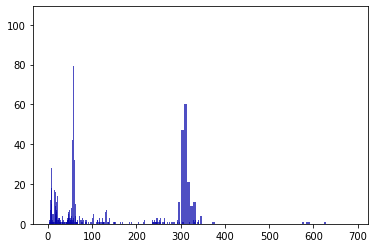

In [35]:
res_final = pd.DataFrame(columns=hist.columns, index=range(0))

for i in range(0,700):
 try:
  
  df_sel = df[(df['NmMesoRegiao']==df.NmMesoRegiao.unique()[0])]
  df_sel = df_sel[df_sel.VlTotalLiquido!=0]
  df_sel['RB'] = df_sel.VlTotalLiquido/df_sel.QtdeVendida
  df_sel = df_sel[df_sel.CodProdutoSimilar==df_sel.CodProdutoSimilar.unique()[i]]
  #df_sel = df_sel[df_sel.CodProdutoSimilar==98]
  n, bins, patches = plt.hist(x=df_sel.RB, bins=12, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
  hist = pd.concat([pd.DataFrame.from_dict(n),pd.DataFrame.from_dict(bins)],axis=1)
  hist.columns = ['n','bins']
  max(hist.n)
  bins_max = list(hist[hist.n==max(hist.n)]['bins'])[0]
  rating = []
  for i in range(0, 13):
    rating.append('menor' if list(hist.bins)[i] <=bins_max else 'maior ')


  hist['Cod_produto']=[df_sel.CodProdutoSimilar.unique()[0]]*13
  hist['Ds_Produto']=[df_sel.DsProdutoSimilar.unique()[0]]*13
  hist['rating']=rating
  hist['bin']=range(0,13)
  hist['Preço_Minimo']=hist[hist.rating=='menor']['bins'].min()
  hist["Preço_Máximo"]=hist[hist.rating=='menor']['bins'].max()
  bin1 = df_sel[df_sel.RB<=hist.bins[0]]['IdCliente']#bin 0
  bin2 = df_sel[(df_sel.RB>hist.bins[0]) & (df_sel.RB<=hist.bins[1])]['IdCliente']#bin 1
  bin3 = df_sel[(df_sel.RB>hist.bins[1]) & (df_sel.RB<=hist.bins[2])]['IdCliente']#bin 2
  bin4 = df_sel[(df_sel.RB>hist.bins[2]) & (df_sel.RB<=hist.bins[3])]['IdCliente']#bin 3
  bin5 = df_sel[(df_sel.RB>hist.bins[3]) & (df_sel.RB<=hist.bins[4])]['IdCliente']#bin 4
  bin6 = df_sel[(df_sel.RB>hist.bins[4]) & (df_sel.RB<=hist.bins[5])]['IdCliente']#bin 5
  bin7 = df_sel[(df_sel.RB>hist.bins[5]) & (df_sel.RB<=hist.bins[6])]['IdCliente']#bin 6
  bin8 = df_sel[(df_sel.RB>hist.bins[6]) & (df_sel.RB<=hist.bins[7])]['IdCliente']#bin 7
  bin9 = df_sel[(df_sel.RB>hist.bins[7]) & (df_sel.RB<=hist.bins[8])]['IdCliente']#bin 8
  bin10 = df_sel[(df_sel.RB>hist.bins[8]) & (df_sel.RB<=hist.bins[9])]['IdCliente']#bin 9
  bin11 = df_sel[(df_sel.RB>hist.bins[9]) & (df_sel.RB<=hist.bins[10])]['IdCliente']#bin 9
  bin12 = df_sel[(df_sel.RB>hist.bins[10]) & (df_sel.RB<=hist.bins[11])]['IdCliente']#bin 9
  bin13 = df_sel[(df_sel.RB>hist.bins[12])]['IdCliente']#bin 9
  lista_clientes = pd.DataFrame([list(bin1),
              list(bin2),
              list(bin3),
              list(bin4),
              list(bin5),
              list(bin6),
              list(bin7),
              list(bin8),
              list(bin9),
              list(bin10),
              list(bin11),
              list(bin12),
              list(bin13)])
  bin1_Qt = df_sel[df_sel.RB<=hist.bins[0]]['QtdeVendida']#bin 0
  bin2_Qt = df_sel[(df_sel.RB>hist.bins[0]) & (df_sel.RB<=hist.bins[1])]['QtdeVendida']#bin 1
  bin3_Qt = df_sel[(df_sel.RB>hist.bins[1]) & (df_sel.RB<=hist.bins[2])]['QtdeVendida']#bin 2
  bin4_Qt = df_sel[(df_sel.RB>hist.bins[2]) & (df_sel.RB<=hist.bins[3])]['QtdeVendida']#bin 3
  bin5_Qt = df_sel[(df_sel.RB>hist.bins[3]) & (df_sel.RB<=hist.bins[4])]['QtdeVendida']#bin 4
  bin6_Qt = df_sel[(df_sel.RB>hist.bins[4]) & (df_sel.RB<=hist.bins[5])]['QtdeVendida']#bin 5
  bin7_Qt = df_sel[(df_sel.RB>hist.bins[5]) & (df_sel.RB<=hist.bins[6])]['QtdeVendida']#bin 6
  bin8_Qt = df_sel[(df_sel.RB>hist.bins[6]) & (df_sel.RB<=hist.bins[7])]['QtdeVendida']#bin 7
  bin9_Qt = df_sel[(df_sel.RB>hist.bins[7]) & (df_sel.RB<=hist.bins[8])]['QtdeVendida']#bin 8
  bin10_Qt = df_sel[(df_sel.RB>hist.bins[8]) & (df_sel.RB<=hist.bins[9])]['QtdeVendida']#bin 9
  bin11_Qt = df_sel[(df_sel.RB>hist.bins[9]) & (df_sel.RB<=hist.bins[10])]['QtdeVendida']#bin 9
  bin12_Qt = df_sel[(df_sel.RB>hist.bins[10]) & (df_sel.RB<=hist.bins[11])]['QtdeVendida']#bin 9
  bin13_Qt = df_sel[(df_sel.RB>hist.bins[12])]['QtdeVendida']#bin 9
 
  lista_clientes_Qt = pd.DataFrame([list(bin1_Qt),
              list(bin2_Qt),
              list(bin3_Qt),
              list(bin4_Qt),
              list(bin5_Qt),
              list(bin6_Qt),
              list(bin7_Qt),
              list(bin8_Qt),
              list(bin9_Qt),
              list(bin10_Qt),
              list(bin11_Qt),
              list(bin12_Qt),
              list(bin13_Qt)])

# Quantidade de Clientes por bin
  hist['quantidade_clientes'] = [len(lista_clientes.iloc[0,:].dropna()),
  len(lista_clientes.iloc[1,:].dropna()),
  len(lista_clientes.iloc[2,:].dropna()),
  len(lista_clientes.iloc[3,:].dropna()),
  len(lista_clientes.iloc[4,:].dropna()),
  len(lista_clientes.iloc[5,:].dropna()),
  len(lista_clientes.iloc[6,:].dropna()),
  len(lista_clientes.iloc[7,:].dropna()),
  len(lista_clientes.iloc[8,:].dropna()),
  len(lista_clientes.iloc[9,:].dropna()),
  len(lista_clientes.iloc[10,:].dropna()),
  len(lista_clientes.iloc[11,:].dropna()),
  len(lista_clientes.iloc[12,:].dropna())
  ]

# Quantidade de itens por bin
  
  hist['volume'] = [sum(lista_clientes_Qt.iloc[0,:].dropna()),
  sum(lista_clientes_Qt.iloc[1,:].dropna()),
  sum(lista_clientes_Qt.iloc[2,:].dropna()),
  sum(lista_clientes_Qt.iloc[3,:].dropna()),
  sum(lista_clientes_Qt.iloc[4,:].dropna()),
  sum(lista_clientes_Qt.iloc[5,:].dropna()),
  sum(lista_clientes_Qt.iloc[6,:].dropna()),
  sum(lista_clientes_Qt.iloc[7,:].dropna()),
  sum(lista_clientes_Qt.iloc[8,:].dropna()),
  sum(lista_clientes_Qt.iloc[9,:].dropna()),
  sum(lista_clientes_Qt.iloc[10,:].dropna()),
  sum(lista_clientes_Qt.iloc[11,:].dropna()),
  sum(lista_clientes_Qt.iloc[12,:].dropna())]

# Agora soma acumulada1
  new_list=[]
  j=0
  for i in range(0,len(hist.volume)):
      j+=hist.volume[i]
      new_list.append(j)
     
  hist['Q_cumsum'] = new_list 
# Agora soma acumulada2
  new_list=[]
  j=0
  for i in range(0,len(hist.volume[::-1].reset_index()['volume'])):
      j+=hist.volume[::-1].reset_index()['volume'][i]
      new_list.append(j)
  new_list[::-1]
  hist['Q_cumsum2'] = new_list[::-1]

  hist['D(p)'] = hist.Q_cumsum2/max(hist.Q_cumsum2)

  #hist['(p-c)*D(p)'] = (hist.bins - float(df_custo[(df_custo.CdFilialExpedicao==64) & (df_custo.CdProdutoSimilar==df_sel.CodProdutoSimilar.unique()[0])].VlrCusto.unique()[0]))*hist['D(p)']
  hist['(p-c)*D(p)'] = (hist.bins - float(df_custo[(df_custo.CdProdutoSimilar==df_sel.CodProdutoSimilar.unique()[0])].VlrCusto.max()))*hist['D(p)']

  hist['D(p)*p'] = hist.bins * hist['D(p)']
 


#hist['Segmento']=df_sel.SegmentoEstrategico.unique()[0]
  res_final = res_final.append(hist)
 except:
    pass



In [ ]:
res_final

In [37]:
res_final['MesoRegiao'] = [df.NmMesoRegiao.unique()[0]]*res_final.shape[0]

In [38]:
res_final_centro = res_final

In [199]:
res_final_NO = res_final

In [203]:
res_final_SUL = res_final

In [206]:
res_final_leste = res_final

In [209]:
res_final_norte = res_final

In [27]:
res_final.to_excel('/content/drive/MyDrive/JOB-Martins/Pricing/1.xlsx')

In [210]:
pd.concat([res_final_centro,
           res_final_NO,
           res_final_SUL,
           res_final_leste,
           res_final_norte
           ],axis = 0).to_excel('/content/drive/MyDrive/JOB-Martins/Pricing/NEW_PRECOS.xlsx')

In [4]:
df_custo[df_custo.CdProdutoSimilar==98]

,SiglaUF,CdCidade,CdFilialExpedicao,CdFilialFaturamento,CdProdutoSimilar,NmProdutoSimilar,SubCategoria,Cluster,IdProduto,CdProduto,NmProduto,VlrCusto,PrcLivro,PrcOtimo,PrcOtimoImpDesc,PrcSugeridoCalculado,PrcSugeridoCalculadoImp,PrcSugeridoPublicado,VariacaoPrecoPublicado
187,GO,217.0,52.0,52.0,98.0,INSET.AEROSOL BAYGON 360ML EMBALAGEM ECONOMICA,INSETICIDA AEROSOL,Branco,208371.0,1702262.0,INSET.AER.BAYGON EUC.360ML OF,6.04,8.46,6.6052,8.6660,8.46,8.67,8.67,0.00
1385,GO,190.0,1.0,1.0,98.0,INSET.AEROSOL BAYGON 360ML EMBALAGEM ECONOMICA,INSETICIDA AEROSOL,Amarelo,186349.0,1701903.0,INSET.AER.BAYGON M.BA.360ML OF,5.85,8.14,6.6052,8.6660,8.14,8.67,8.67,0.00
2203,GO,220.0,1.0,1.0,98.0,INSET.AEROSOL BAYGON 360ML EMBALAGEM ECONOMICA,INSETICIDA AEROSOL,Amarelo,186349.0,1701903.0,INSET.AER.BAYGON M.BA.360ML OF,5.85,8.14,6.6052,8.6660,8.14,8.67,8.67,0.00
3258,GO,196.0,52.0,52.0,98.0,INSET.AEROSOL BAYGON 360ML EMBALAGEM ECONOMICA,INSETICIDA AEROSOL,Branco,208371.0,1702262.0,INSET.AER.BAYGON EUC.360ML OF,6.04,8.46,6.6052,8.6660,8.46,8.67,8.67,0.00
3263,GO,129.0,64.0,64.0,98.0,INSET.AEROSOL BAYGON 360ML EMBALAGEM ECONOMICA,INSETICIDA AEROSOL,Branco,208370.0,1702261.0,INSET.AER.BAYGON A.TO.360ML OF,5.87,8.38,6.6052,8.6660,8.38,8.67,8.67,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563696,GO,208.0,64.0,64.0,98.0,INSET.AEROSOL BAYGON 360ML EMBALAGEM ECONOMICA,INSETICIDA AEROSOL,Amarelo,208371.0,1702262.0,INSET.AER.BAYGON EUC.360ML OF,5.87,8.38,6.6052,8.6660,8.38,8.67,8.67,0.00
2567767,GO,4434.0,64.0,64.0,98.0,INSET.AEROSOL BAYGON 360ML EMBALAGEM ECONOMICA,INSETICIDA AEROSOL,Branco,208371.0,1702262.0,INSET.AER.BAYGON EUC.360ML OF,5.87,8.38,6.6052,8.6660,8.38,8.67,8.67,0.00
2568591,GO,4279.0,1.0,1.0,98.0,INSET.AEROSOL BAYGON 360ML EMBALAGEM ECONOMICA,INSETICIDA AEROSOL,Branco,208371.0,1702262.0,INSET.AER.BAYGON EUC.360ML OF,5.85,8.14,6.6052,8.6660,8.14,8.67,8.67,0.00
2569068,GO,2152.0,1.0,1.0,98.0,INSET.AEROSOL BAYGON 360ML EMBALAGEM ECONOMICA,INSETICIDA AEROSOL,Branco,208370.0,1702261.0,INSET.AER.BAYGON A.TO.360ML OF,5.85,8.14,6.6052,8.6660,8.14,8.67,8.67,0.00
